# Face recognition demo

 This pipeline model consists of two parts:  
1. Face detection - detecting faces in the image
2. Face recognition - recognizing detected faces

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Read data sample

In [2]:
img1 = cv2.imread('5.png')
rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('6.png')
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

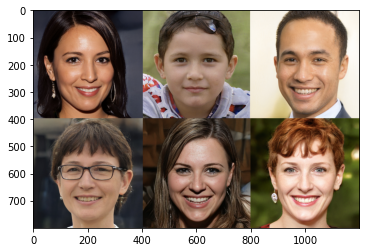

In [3]:
plt.imshow(rgb1)

## 2. Perform inference

In [4]:
from hydrosdk import Cluster, Application
import grpc

In [5]:
cluster = Cluster(
    http_address="<hydrosphere-http-address>",
    grpc_address="<hydrosphere-grpc-address>",
    ssl=True,                                         # turn off, if your Hydrosphere instance doesn't have
    grpc_credentials=grpc.ssl_channel_credentials()   # TLS certificates installed
)

### Face detection

Perform inference only on the face detection model.

In [6]:
app = Application.find(cluster, "<application-name>")
app.lock_while_starting()
predictor = app.predictor()

In [7]:
result = predictor.predict({"x": rgb1})

In [8]:
print(f'Detected {len(result["faces"])} faces')

Detected 6 faces


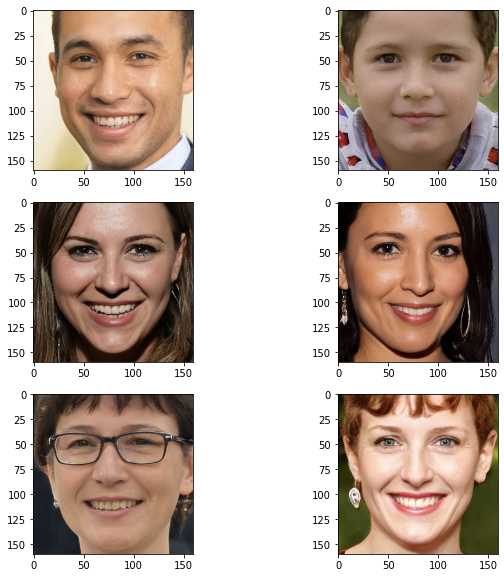

In [9]:
fig = plt.figure(figsize=(10, 10))
for i in range(1, 6 +1):
    fig.add_subplot(3, 2, i)
    plt.imshow(result["faces"][i-1])
plt.show()

### Face recognition

Perform inference on a pipeline consisting of face detection and face recognition models. 

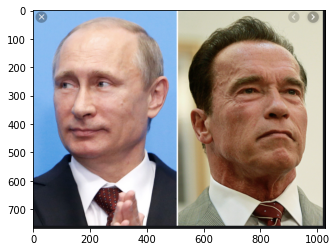

In [10]:
plt.imshow(rgb2)

In [12]:
app = Application.find(cluster, "<application-name>")
app.lock_while_starting()
predictor = app.predictor()

In [13]:
result = predictor.predict({"x": rgb2})

In [24]:
print("Detected persons:", result["y"])

Detected persons: ['Vladimir Putin' 'Arnold Schwarzenegger']
